<a href="https://colab.research.google.com/github/priya170807/Time-seriesAnalysis/blob/main/Azure_dataset2_fourfeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [167]:
data_path = '/content/drive/MyDrive/vmtable.csv/vmtable.csv'
headers=['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecount', 'vmmemory']
trace_dataframe = pd.read_csv(data_path, header=None, index_col=False,names=headers,delimiter=',')


#Compute VM Lifetime based on VM Created and VM Deleted timestamps and transform to Hour
trace_dataframe['lifetime'] = np.maximum((trace_dataframe['vmdeleted'] - trace_dataframe['vmcreated']),300)/ 3600
trace_dataframe['corehour'] = trace_dataframe['lifetime'] * trace_dataframe['vmcorecount']
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667


In [168]:
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667


In [169]:
vm_count = trace_dataframe.shape[0]
subscription_count = trace_dataframe['subscriptionid'].unique().shape[0]
deployment_count = trace_dataframe['deploymentid'].unique().shape[0]
total_vm_hour_available = trace_dataframe['lifetime'].sum()
total_core_hour_available = trace_dataframe['corehour'].sum()

print("Total Number of Virtual Machines in the Dataset: %d" % vm_count)
print("Total Number of Subscriptions in the Dataset: %d" % subscription_count)
print("Total Number of Deployments in the Dataset: %d" % deployment_count)
print("Total VM Hours Available in the Dataset: %f" % total_vm_hour_available)
print("Total Core Hours Available in the Dataset: %f" % total_core_hour_available)

Total Number of Virtual Machines in the Dataset: 2013767
Total Number of Subscriptions in the Dataset: 5958
Total Number of Deployments in the Dataset: 35941
Total VM Hours Available in the Dataset: 104371713.416667
Total Core Hours Available in the Dataset: 237815104.750000


In [170]:
trace_dataframe["subscriptionid"].value_counts()

+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ESAgTaUXcM091m1HeTX7    128047
1pvP5oaK47WSSY0IZRNEQYdTLEx79rf7Gj1isBYW1jDOFGZXLQGTa0V3XnCrLrkB    111509
IBRuELx83WZHD8ZBmRnQ7nN53DxcMPAO7szqGt218k7STW7rx0pjgjj5eLJ0FLbn     93427
BShs5OvpbfrccmXj7X4MwSxkSFVNdSOzhYaDEKCijpvxWWkNByokK6c31F1uCT7R     85874
8aRytjOt2E+dixkPugZHbKFROou3eQLywft928DTtFP2o3QzFTIxYQ+8r0kdkzvo     68490
                                                                     ...  
MWedWs/2WACTJLZNCAJTr0v9iDw6B7KaE6alOEwUDIbJ+Tkk0W0JMNXhTDpN6ZE2         1
C0pSbJ9LtMzPpHT07C7u+EU/62XtuZaFy1ChhLsRWagPBQf3HE9j7BFl2hQW9/H7         1
Z2pf67QxQJe88aMw1p0AnyQ5y9V9KVXMsfh2jQvM05vQgT4DPgkP/eVWzhrZFHvf         1
nqD+d4WoH7oihE7Wl3FQTXQwTv35xy5q1hYhNT/AsFtpft7fm/Z11SRlkrP63DCv         1
L/9cEAFRe7qt/x4lzfWzWUR1ewoFUqxuj+zoXoB7eS4oEXDCbUrSLI0/YfD0srq3         1
Name: subscriptionid, Length: 5958, dtype: int64

In [171]:
oneVM_data = trace_dataframe[trace_dataframe["subscriptionid"] == "+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ESAgTaUXcM091m1HeTX7"]

In [172]:
oneVM_data.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
87435,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
87436,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
87437,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
87438,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
87439,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667


In [173]:
len(oneVM_data)

128047

In [174]:
oneVM_data.reset_index(drop=True, inplace=True)

In [175]:
yearly_data = oneVM_data.loc[0:8039]

In [176]:
yearly_data

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
1,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
2,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
3,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
4,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,OTZc2y53zvg3JhthNOmD7rri2jIx6ylz/DIJT1tNugg7cZ...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,434400,435300,89.453653,24.363767,89.453653,Unkown,4,7.00,0.250000,1.000000
8036,tnl2xbaHNEfNpKM9Ylt4GdprJQebEUKI5EX85FG5qipIMU...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2120400,2129100,98.841736,5.960542,95.854683,Unkown,8,14.00,2.416667,19.333333
8037,taFDbwKxCHHITWK1aZR/apJfQpfgFIULfe2mlctkC2LSxk...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,434400,435300,70.042481,19.129137,70.042481,Unkown,4,7.00,0.250000,1.000000
8038,PAwZT/m/JA73C1YnFV1f29HgcPsxHojX2AlAdmHJSDww34...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1221000,1236900,47.881668,1.742805,6.803815,Delay-insensitive,8,14.00,4.416667,35.333333


In [177]:
from datetime import datetime
from datetime import datetime
Timestamp = pd.date_range('2020-01-01', periods=8040, freq='H')
#bytes_df["Timestamp"] = pd.date_range(datetime(2020, 11, 15, hour=23, minute=0), periods=3945, freq='5min')

In [178]:
time_stamp = pd.Series(Timestamp)

In [179]:
useful_data = yearly_data.copy()

In [180]:
useful_data["Timestamp"] = time_stamp

In [181]:
useful_data.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour,Timestamp
0,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000,2020-01-01 00:00:00
1,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000,2020-01-01 01:00:00
2,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333,2020-01-01 02:00:00
3,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333,2020-01-01 03:00:00
4,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667,2020-01-01 04:00:00


In [182]:
data = useful_data[["maxcpu", "vmcorecount", "lifetime", "corehour", "Timestamp"]]

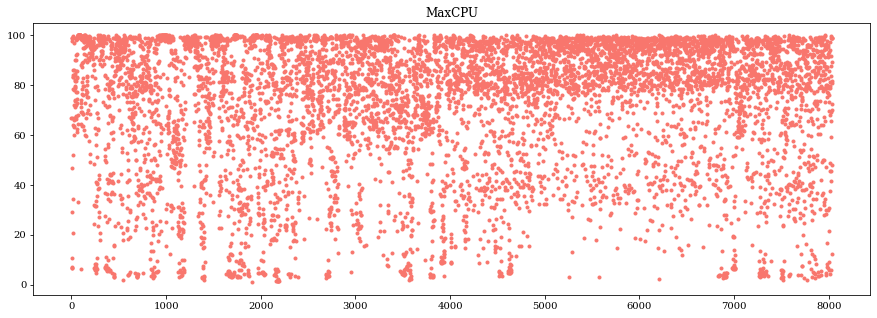

In [183]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
data['maxcpu'].plot(style='.', figsize=(15,5), color=color_pal[0], title='MaxCPU')
plt.show()

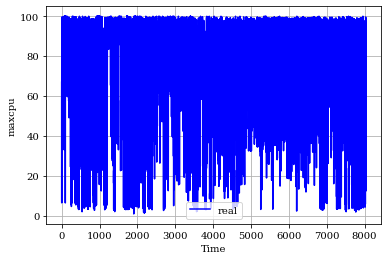

In [184]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(data['maxcpu'], "-b", label="real")
# plt.plot(y_pred, "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
#plt.savefig('original.png', format='png', dpi=720)
plt.show()

In [185]:
data.head()

,maxcpu,vmcorecount,lifetime,corehour,Timestamp
0,66.909246,8,1.250000,10.000000,2020-01-01 00:00:00
1,6.510768,8,1.250000,10.000000,2020-01-01 01:00:00
2,66.956558,8,1.416667,11.333333,2020-01-01 02:00:00
3,98.795780,1,0.083333,0.083333,2020-01-01 03:00:00
4,6.472197,8,5.833333,46.666667,2020-01-01 04:00:00


In [186]:
data = data.set_index("Timestamp")

In [187]:
data.head()

,maxcpu,vmcorecount,lifetime,corehour
Timestamp,,,,
2020-01-01 00:00:00,66.909246,8,1.250000,10.000000
2020-01-01 01:00:00,6.510768,8,1.250000,10.000000
2020-01-01 02:00:00,66.956558,8,1.416667,11.333333
2020-01-01 03:00:00,98.795780,1,0.083333,0.083333
2020-01-01 04:00:00,6.472197,8,5.833333,46.666667


In [188]:
data = data.reset_index()

In [189]:
data.head()

,Timestamp,maxcpu,vmcorecount,lifetime,corehour
0,2020-01-01 00:00:00,66.909246,8,1.250000,10.000000
1,2020-01-01 01:00:00,6.510768,8,1.250000,10.000000
2,2020-01-01 02:00:00,66.956558,8,1.416667,11.333333
3,2020-01-01 03:00:00,98.795780,1,0.083333,0.083333
4,2020-01-01 04:00:00,6.472197,8,5.833333,46.666667


In [190]:
# the other implementation using tensorflow datasets

In [191]:
data.to_csv("/tmp/cleaned_data.csv")

In [192]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

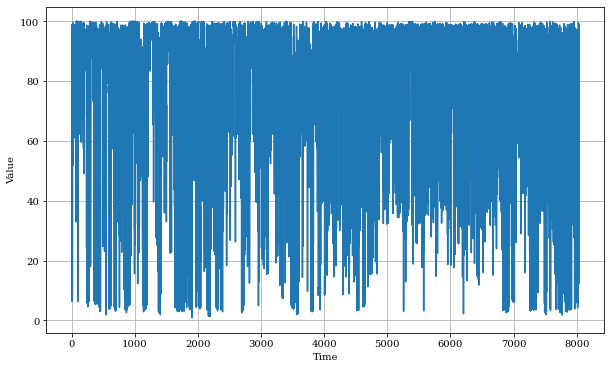

In [193]:
import csv
time_step = []
maxcpu = []

with open('/tmp/cleaned_data.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    maxcpu.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(maxcpu)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

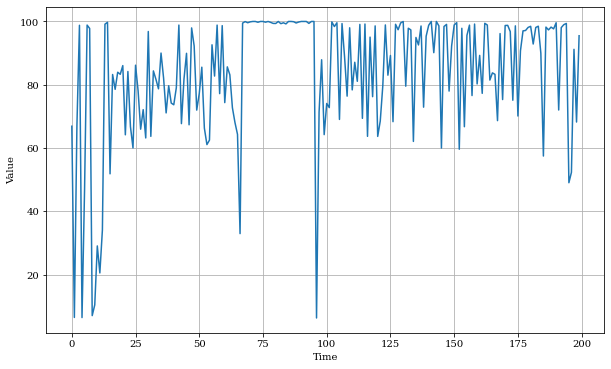

In [194]:
series = np.array(maxcpu)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series, start=0, end=200)

In [195]:
# split_time = 7000
# time_train = time[:split_time]
# x_train = series[:split_time]
# time_valid = time[split_time:]
# x_valid = series[split_time:]

# #window_size = 48
# #batch_size = 32
# shuffle_buffer_size = 1000


In [196]:
df_new = data[["vmcorecount", "lifetime", "corehour", "maxcpu"]]

In [197]:
series_new = df_new.values

In [198]:
series_new.shape

(8040, 4)

In [202]:
split_time = 7000
time_train = time[:split_time]
x_train = series_new[:split_time]
time_valid = time[split_time:]
x_valid = series_new[split_time:]

#window_size = 48
#batch_size = 32
shuffle_buffer_size = 1000


In [203]:
print(f'X_train.shape = {x_train.shape}')
print(f'X_valid.shape = {x_valid.shape}')

X_train.shape = (7000, 4)
X_valid.shape = (1040, 4)


In [204]:
# x_testing = x_valid[:10]
# print(f'x_testing.shape = {x_testing.shape}')
# tf.expand_dims(x_testing, axis=-1)
# def windowed(series, window_size, batch_size, shuffle_buffer):
#     # series = tf.expand_dims(series, axis=-1)
#     ds = tf.data.Dataset.from_tensor_slices(series)
#     ds = ds.window(window_size+1, shift=1, drop_remainder=True)
#     for val in ds:
#       for item in val:
#         print(item.numpy(), end=" ")
#       print()
#     print("...................................................................")
#     ds = ds.flat_map(lambda w: w.batch(window_size + 1))
#     for window in ds:
#       print(window.numpy())
#     print("*******************************************************************************************")
#     # ds = ds.shuffle(shuffle_buffer)
#     ds = ds.map(lambda w: (w[:-1], w[1:]))
#     for x, y in ds:
#       print('x = ', x.numpy())
#       print('y = ', y.numpy())
#     return ds.batch(batch_size).prefetch(1)
# windowed(x_testing, window_size=2, batch_size=1, shuffle_buffer=10)

In [205]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    # for x, y in ds:
    #   print('x = ', x.numpy())
    #   print('y = ', y.numpy())
    return ds.batch(batch_size).prefetch(1)

In [108]:
# def model_forecast(model, series, window_size):
#     ds = tf.data.Dataset.from_tensor_slices(series)
#     ds = ds.window(window_size, shift=1, drop_remainder=True)
#     ds = ds.flat_map(lambda w: w.batch(window_size))
#     ds = ds.batch(32).prefetch(1)
#     forecast = model.predict(ds)
#     return forecast

In [207]:
import tensorflow as tf
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 72
batch_size = 128
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
# print(train_set)
print(x_train.shape)
# print(train_set.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 4]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  #tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(30, activation='relu')),
  tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10, activation='relu')),
  #tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(4)
  # tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


(7000, 4)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
55/55 [==============================] - 4s 21ms/step - loss: 21.5770 - mae: 22.0282
Epoch 2/100
55/55 [==============================] - 1s 22ms/step - loss: 21.5770 - mae: 22.0282
Epoch 3/100
55/55 [==============================] - 1s 22ms/step - loss: 21.5770 - mae: 22.0282
Epoch 4/100
55/55 [==============================] - 1s 21ms/step - loss: 21.5770 - mae: 22.0281
Epoch 5/100
55/55 [==============================] - 1s 22ms/step - loss: 21.5769 - mae: 22.0281
Epoch 6/100
55/55 [==============================] - 1s 22ms/step - loss: 21.5769 - mae: 22.0281
Epoch 7/100
55/55 [==============================] - 1s 22ms/step - loss: 21.5769 - mae: 22.0280
Epoch 8/100
55/55 [==============================] - 1s 22ms/step - loss: 21.5768 - mae: 22.0280
Epoch 9/100
55/55 [==============================] - 1s 22ms/step - loss: 21.5767 - mae: 22.0279
Epoch 10/100
55/55 [==============================] - 1s 22ms/step - loss: 21.5767 - mae: 22.0279
Epoch 11/100
55/55 [=========

(1e-08, 0.0001, 0.0, 60.0)

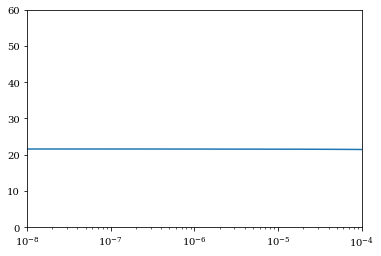

In [208]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [210]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=72, batch_size=128, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 4]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(30, activation='relu')),
  tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10, activation='relu')),
  # tf.keras.layers.Dense(30, activation="relu"),
  # tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
55/55 [==============================] - 4s 20ms/step - loss: 19.9728 - mae: 20.4610
Epoch 2/500
55/55 [==============================] - 1s 21ms/step - loss: 9.5624 - mae: 10.0356
Epoch 3/500
55/55 [==============================] - 1s 21ms/step - loss: 8.8611 - mae: 9.3308
Epoch 4/500
55/55 [==============================] - 1s 21ms/step - loss: 8.5344 - mae: 9.0020
Epoch 5/500
55/55 [==============================] - 1s 21ms/step - loss: 8.3043 - mae: 8.7705
Epoch 6/500
55/55 [==============================] - 1s 21ms/step - loss: 8.1181 - mae: 8.5828
Epoch 7/500
55/55 [==============================] - 1s 21ms/step - loss: 7.9735 - mae: 8.4369
Epoch 8/500
55/55 [==============================] - 1s 21ms/step - loss: 7.8554 - mae: 8.3176
Epoch 9/500
55/55 [==============================] - 1s 21ms/step - loss: 7.7467 - mae: 8.2071
Epoch 10/500
55/55 [==============================] - 1s 22ms/step - loss: 7.6479 - mae: 8.1065
Epoch 11/500
55/55 [==========================

In [211]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          1260      
_________________________________________________________________
lstm (LSTM)                  (None, None, 60)          29040     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 60)          29040     
_________________________________________________________________
time_distributed (TimeDistri (None, None, 30)          1830      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 10)          310       
_________________________________________________________________
dense_2 (Dense)              (None, None, 4)           44        
_________________________________________________________________
lambda (Lambda)              (None, None, 4)           0

In [115]:
series.shape

(8040,)

In [116]:
series_new.shape

(8040, 4)

In [212]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [213]:
rnn_forecast_total = model_forecast(model, series_new, window_size)
rnn_forecast = model_forecast(model, x_valid, window_size)

In [214]:
#print("train_set shape ={}".format(len(train_set)))
print("rnn_forecast shape ={}".format(rnn_forecast.shape))
print("rnn_forecast_total shape ={}".format(rnn_forecast_total.shape))

rnn_forecast shape =(969, 72, 4)
rnn_forecast_total shape =(7969, 72, 4)


In [215]:
rnn_forecast_totalpoints = rnn_forecast[:, :, :]

In [216]:
rnn_forecast_totalpoints.shape

(969, 72, 4)

In [217]:
rnn_forecast_1d = rnn_forecast[:, -1, 0]

In [218]:
rnn_forecast_1d.shape

(969,)

In [219]:
rnn_forecast_total[:-1,-1,0].shape

(7968,)

In [220]:
split_time - window_size

6928

In [221]:
rnn_forecast_total_1d = rnn_forecast_total[split_time - window_size:-1,-1,0]

In [222]:
rnn_forecast_total_1d.shape

(1040,)

In [223]:
time_valid.shape

(1040,)

In [224]:
x_valid.shape

(1040, 4)

In [ ]:
# last_value = rnn_forecast[-1,:,:]
# next_pred = model_forecast(model, last_value, window_size)

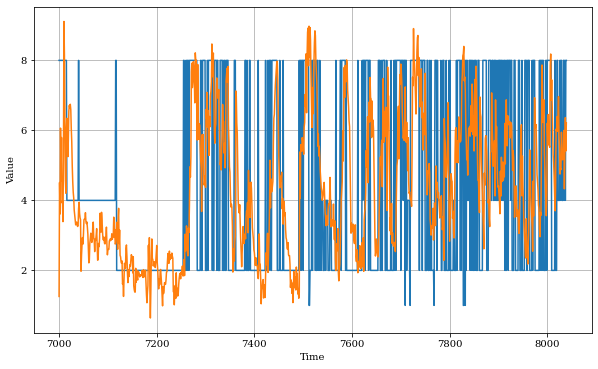

In [228]:
x_valid_maxcpu = x_valid[:,0]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid_maxcpu)
plot_series(time_valid, rnn_forecast_total_1d)

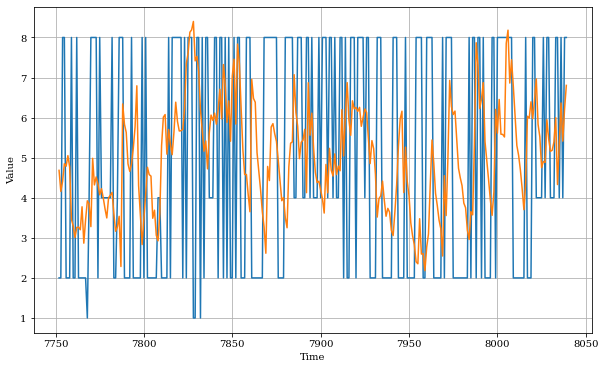

In [229]:
plt.figure(figsize=(10, 6))
plot_series(time_valid[-288:], x_valid_maxcpu[-288:])
plot_series(time_valid[-288:], rnn_forecast_1d[-288:])

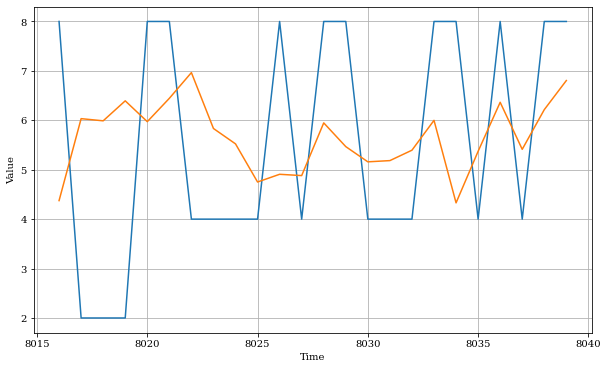

In [230]:
plt.figure(figsize=(10, 6))
plot_series(time_valid[-24:], x_valid_maxcpu[-24:])
plot_series(time_valid[-24:], rnn_forecast_1d[-24:])

In [231]:
#get the last_value from the predictions on the test set and add back the array to the input

last_value = rnn_forecast_totalpoints[-1,:,:]


In [232]:
last_value.shape

(72, 4)

In [233]:
last_value

array([[ 2.77894878e+00, -2.62087202e+00,  1.77983344e+00,
         7.51242981e+01],
       [ 5.90851688e+00, -1.50536501e+00, -1.43474340e+00,
         6.64503098e+01],
       [ 2.26110816e+00, -1.21782815e+00,  1.96992016e+00,
         8.34003067e+01],
       [ 5.92533731e+00,  1.52893424e+00,  1.08776016e+01,
         8.18152161e+01],
       [ 7.62647009e+00,  3.57689530e-01,  5.50521898e+00,
         7.36062164e+01],
       [ 8.40721321e+00, -5.12162387e-01,  1.58132172e+00,
         7.27677536e+01],
       [ 7.40877771e+00, -8.75722826e-01, -2.99878716e+00,
         6.40536346e+01],
       [ 6.70521545e+00,  2.14609131e-01,  2.79052114e+00,
         6.87426071e+01],
       [ 6.78333330e+00,  1.83521956e-01,  2.54356122e+00,
         6.74362793e+01],
       [ 6.09550762e+00,  4.82825562e-02,  1.47776008e+00,
         7.19849854e+01],
       [ 5.34014463e+00,  1.23856775e-01,  1.54310608e+00,
         7.68486481e+01],
       [ 5.12607193e+00,  3.86759639e-03,  8.87039304e-01,
      

In [234]:
last_value.shape

(72, 4)

In [235]:
next_pred1 = model_forecast(model, last_value, window_size)

In [236]:
next_pred1

array([[[ 3.543765  , -2.2738419 ,  2.7604551 , 74.02202   ],
        [ 3.5786412 , -1.7379755 ,  3.1499922 , 79.64902   ],
        [ 2.785854  , -0.45628342,  2.6987956 , 85.33087   ],
        [ 4.087285  ,  0.6366484 ,  4.0770307 , 86.79805   ],
        [ 4.228465  ,  0.75892097,  4.6964526 , 84.92845   ],
        [ 3.7241964 ,  0.96511954,  4.928748  , 83.18894   ],
        [ 3.867086  ,  0.6116526 ,  2.697648  , 79.92424   ],
        [ 4.3517447 ,  0.28302538,  1.4670521 , 79.56963   ],
        [ 4.655861  ,  0.27271545,  1.8400624 , 79.70585   ],
        [ 4.9317203 ,  0.25585088,  1.9885153 , 78.74943   ],
        [ 4.9239545 ,  0.23258907,  1.8367813 , 78.66866   ],
        [ 4.7495275 ,  0.2191998 ,  1.5987144 , 79.20317   ],
        [ 4.497263  ,  0.22223815,  1.366055  , 79.87607   ],
        [ 4.1862683 ,  0.21525827,  0.9911597 , 80.50067   ],
        [ 3.9370604 ,  0.20290595,  0.65672547, 81.02891   ],
        [ 3.7182794 ,  0.20485073,  0.41457117, 81.345825  ],
        

In [237]:
next_pred1.shape

(1, 72, 4)

In [238]:
second_input = next_pred1[-1,:,:]

In [239]:
second_input.shape

(72, 4)

In [240]:
second_input

array([[ 3.543765  , -2.2738419 ,  2.7604551 , 74.02202   ],
       [ 3.5786412 , -1.7379755 ,  3.1499922 , 79.64902   ],
       [ 2.785854  , -0.45628342,  2.6987956 , 85.33087   ],
       [ 4.087285  ,  0.6366484 ,  4.0770307 , 86.79805   ],
       [ 4.228465  ,  0.75892097,  4.6964526 , 84.92845   ],
       [ 3.7241964 ,  0.96511954,  4.928748  , 83.18894   ],
       [ 3.867086  ,  0.6116526 ,  2.697648  , 79.92424   ],
       [ 4.3517447 ,  0.28302538,  1.4670521 , 79.56963   ],
       [ 4.655861  ,  0.27271545,  1.8400624 , 79.70585   ],
       [ 4.9317203 ,  0.25585088,  1.9885153 , 78.74943   ],
       [ 4.9239545 ,  0.23258907,  1.8367813 , 78.66866   ],
       [ 4.7495275 ,  0.2191998 ,  1.5987144 , 79.20317   ],
       [ 4.497263  ,  0.22223815,  1.366055  , 79.87607   ],
       [ 4.1862683 ,  0.21525827,  0.9911597 , 80.50067   ],
       [ 3.9370604 ,  0.20290595,  0.65672547, 81.02891   ],
       [ 3.7182794 ,  0.20485073,  0.41457117, 81.345825  ],
       [ 3.5269692 ,  0.

In [241]:
second_input_last_element = second_input[-1][0]

In [242]:
second_input_last_element

6.6708236

In [243]:
next_pred2 = model_forecast(model, second_input, window_size)

In [244]:
next_pred2

array([[[ 3.4819164 , -2.2922912 ,  3.1805859 , 73.65561   ],
        [ 3.9437928 , -2.0445516 ,  4.187964  , 80.903015  ],
        [ 3.4098804 , -0.31972006,  4.1113987 , 84.98067   ],
        [ 3.0880473 ,  0.8737229 ,  3.6902413 , 84.1734    ],
        [ 3.9696262 ,  0.6743196 ,  4.12606   , 86.78103   ],
        [ 3.1486585 ,  0.9298075 ,  4.407655  , 86.52138   ],
        [ 3.212879  ,  0.71025175,  3.311491  , 86.85195   ],
        [ 3.4032373 ,  0.5470859 ,  2.61624   , 86.55809   ],
        [ 3.5157077 ,  0.4382251 ,  2.1603374 , 86.56395   ],
        [ 3.599479  ,  0.39396435,  1.9887179 , 86.290184  ],
        [ 3.6824129 ,  0.3798561 ,  1.9387662 , 85.681244  ],
        [ 3.7305043 ,  0.36146808,  1.8163011 , 85.062325  ],
        [ 3.7411072 ,  0.34045932,  1.6511321 , 84.60962   ],
        [ 3.6901207 ,  0.3234422 ,  1.4524937 , 84.35883   ],
        [ 3.5868273 ,  0.31231734,  1.2306035 , 84.215     ],
        [ 3.4519024 ,  0.3077751 ,  1.0129437 , 84.146065  ],
        

In [245]:
third_input=next_pred2[-1,:,:]

In [246]:
third_input_last_element=third_input[-1][0]

In [247]:
third_input_last_element

5.7016306

In [248]:
next_pred3 = model_forecast(model,third_input,window_size)

In [249]:
next_pred3

array([[[ 3.6152205 , -2.2431166 ,  3.485465  , 73.67702   ],
        [ 4.1750827 , -2.049289  ,  4.715653  , 81.14663   ],
        [ 4.1296916 , -0.33924747,  4.9618645 , 84.9065    ],
        [ 3.3472636 ,  0.96907   ,  4.46976   , 83.40527   ],
        [ 4.0779977 ,  0.75700766,  4.673199  , 86.325745  ],
        [ 3.2249353 ,  0.93373805,  4.5694394 , 86.78754   ],
        [ 3.1356893 ,  0.70751905,  3.3397734 , 87.93403   ],
        [ 3.187994  ,  0.57831967,  2.7654827 , 88.50166   ],
        [ 3.1838536 ,  0.47459677,  2.204007  , 88.68044   ],
        [ 3.1823502 ,  0.42111164,  1.9194067 , 88.80234   ],
        [ 3.183692  ,  0.39519256,  1.7469599 , 88.58881   ],
        [ 3.1819642 ,  0.3806455 ,  1.6184106 , 88.261475  ],
        [ 3.177651  ,  0.3734259 ,  1.5236483 , 87.9071    ],
        [ 3.162726  ,  0.37100074,  1.4472797 , 87.5961    ],
        [ 3.1273022 ,  0.37090555,  1.3653145 , 87.35188   ],
        [ 3.068737  ,  0.37308428,  1.2723893 , 87.16374   ],
        

In [250]:
fourth_input=next_pred3[-1,:,:]

In [251]:
fourth_input_last_element=fourth_input[-1][0]

In [252]:
fourth_input_last_element

4.4650326

In [253]:
next_pred4 = model_forecast(model,fourth_input,window_size)

In [254]:
fifth_input = next_pred4[-1,:,:]

In [255]:
fifth_input_last_element=fifth_input[-1][0]

In [256]:
fifth_input_last_element

3.1441092

In [257]:
next_pred5 = model_forecast(model,fifth_input,window_size)

In [258]:
sixth_input = next_pred5[-1,:,:]

In [259]:
sixth_input_last_element=sixth_input[-1][0]

In [260]:
sixth_input_last_element

2.2059746

In [261]:
# Building the auto-regressive model for future predictions.

In [262]:
def auto_regressive_forecast(model,rnn_forecast_totalpoints,window_size):
  """
  finding the next prediction(sequence) and adding the sequence back as the input to predict next sequence.
  """
  predictions_future=[]
  count=0
  last_value = rnn_forecast_totalpoints[-1,:,:]
  predictions_future.append(last_value[-1][0])
  for i in range(24):
    next_pred = model_forecast(model, last_value, window_size)
    temp_value = next_pred[-1,:,:]
    predictions_future.append(temp_value[-1][0])
    last_value = temp_value
    count+=1
  return predictions_future

In [263]:
predictions_future = auto_regressive_forecast(model,rnn_forecast_totalpoints,window_size)

In [264]:
predictions_future

[6.8047442,
 6.6708236,
 5.7016306,
 4.4650326,
 3.1441092,
 2.2059746,
 1.7918632,
 1.6108632,
 1.5126452,
 1.4496639,
 1.4092193,
 1.3856306,
 1.3732746,
 1.3673395,
 1.3646588,
 1.3635248,
 1.3630867,
 1.362984,
 1.3630226,
 1.3631225,
 1.3632252,
 1.363346,
 1.3634562,
 1.3635486,
 1.3636305]